In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys

from TS_model.vizualization import PerformEDA
from TS_model.feature_engeneering import FeatureEngineer
from TS_model.feature_selection import TransferEntropyFeatureSelection

%load_ext autoreload
%autoreload 2

In [2]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

In [3]:
data = pd.read_excel('Project 2_2023.xlsx', sheet_name='Data', parse_dates=True)
data.columns = data.columns.str.lower()
data['date'] = pd.to_datetime(data['date'])
data.head()

,date,income,outcome,balance
0,2017-01-09,1.343028,1.487865,-0.155904
1,2017-01-10,1.068610,1.194182,-0.125572
2,2017-01-11,0.944429,0.936663,0.007767
3,2017-01-12,1.672202,0.875379,0.800391
4,2017-01-13,0.955924,0.975645,-0.019721


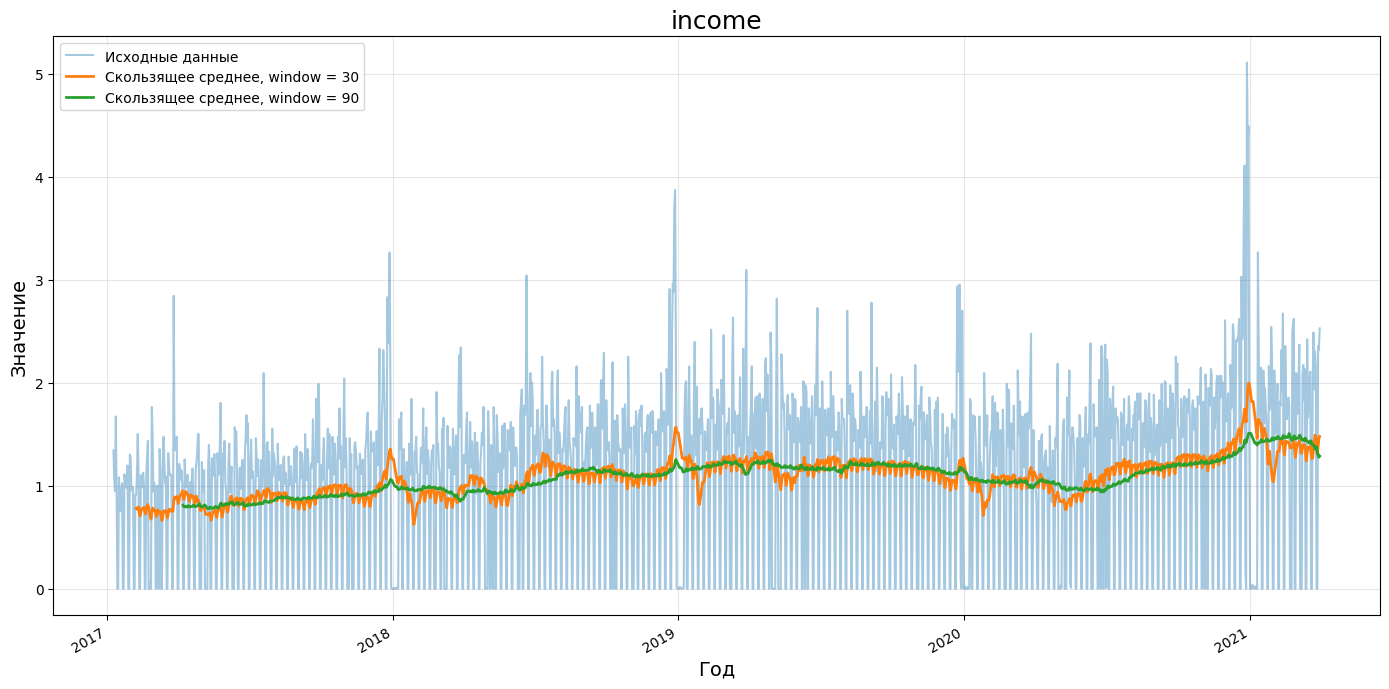

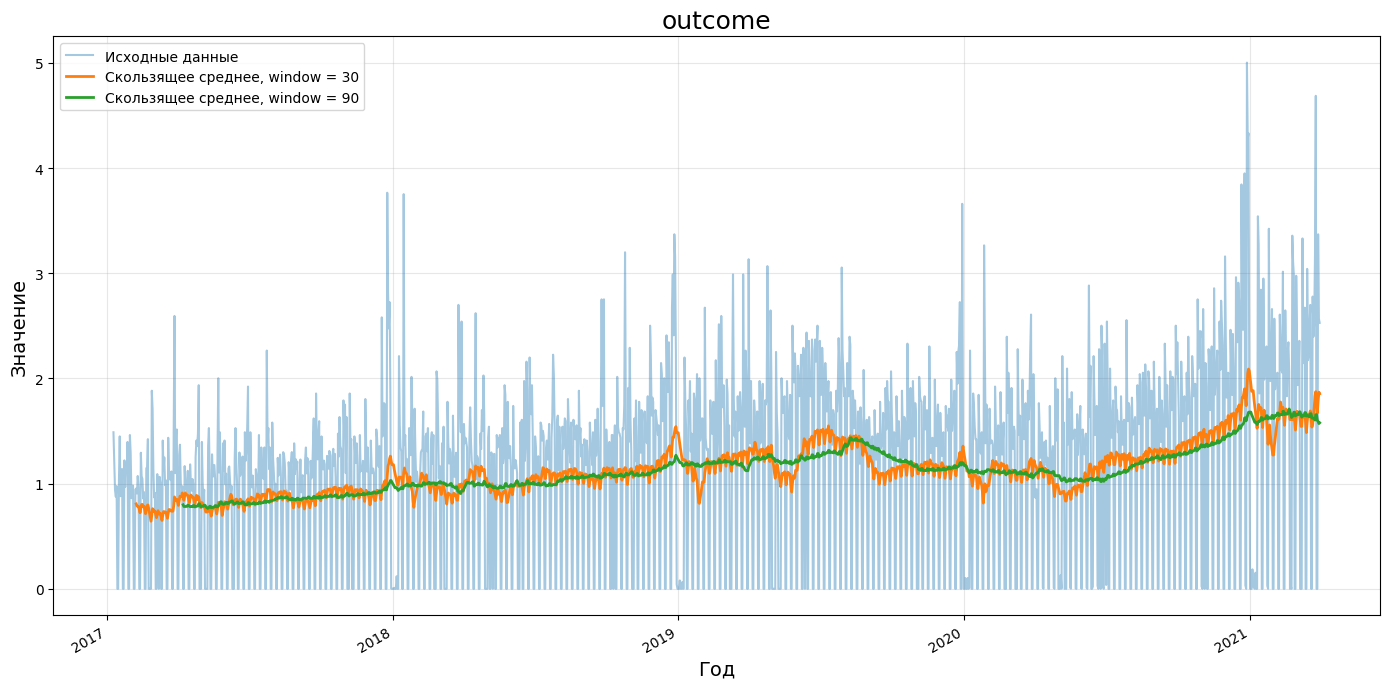

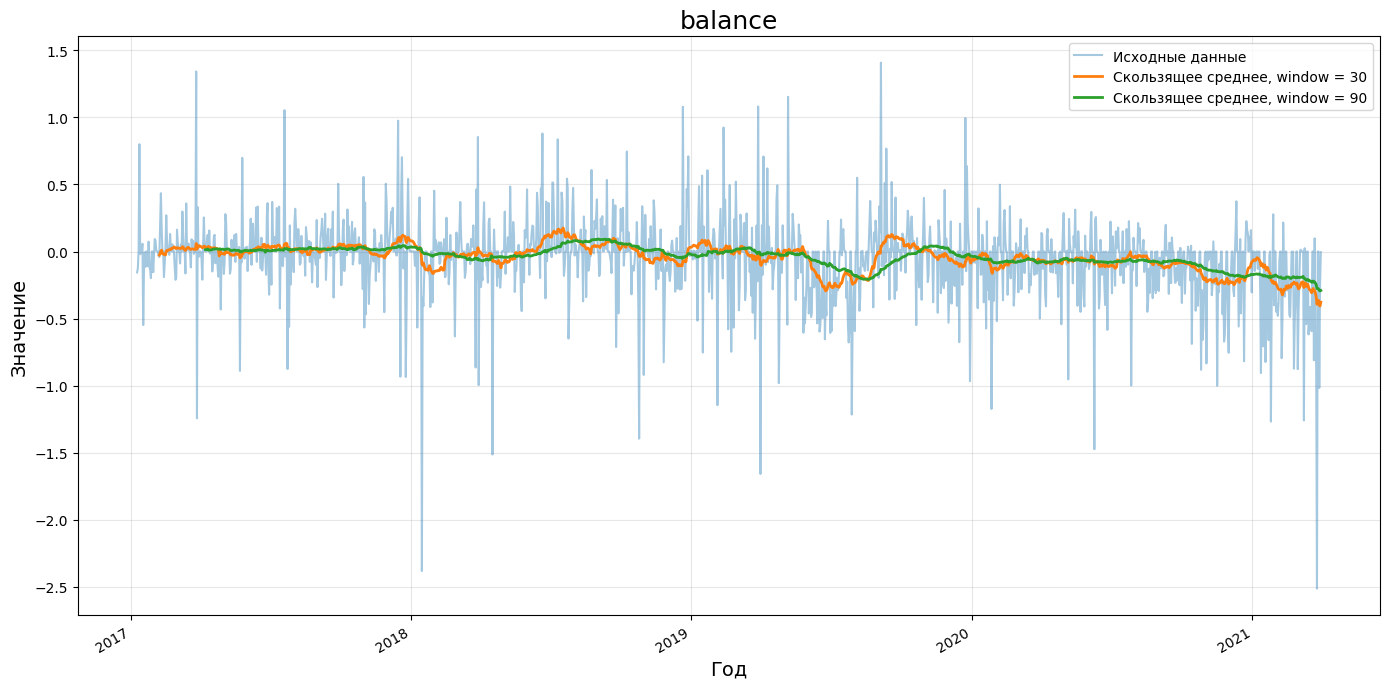

In [4]:
for col in data.copy().drop(['date'], axis=1).columns:
    PerformEDA(data=data).vizualize_var(col, windows=[30, 90])

In [5]:
feature_extactor = FeatureEngineer(data)

In [6]:
feature_extactor.add_lag_features(lags=[1, 2, 3, 7, 30, 60])
feature_extactor.add_rolling_features(windows=[3, 7, 30])
feature_extactor.add_seasonal_features()
# feature_extactor.add_special_dates() ТУТ НАДО ПЕРЕДАТЬ ДАТЫ НАЛОГОВОГО КАЛЕНДАРЯ В ФОРМАТЕ КОТОРЫЙ ЗАШИТ В МЕТОДЕ ИЛИ ПОМЕНЯТЬ МЕТОД
# add_macro_features() ДАТАФРЕЙМ МАКРО ФИЧЕЙ
data_more = feature_extactor.get_feature_df()

In [7]:
data_more.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1483 entries, 2017-03-10 to 2021-03-31
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   balance_lag1     1483 non-null   float64
 1   income_lag1      1483 non-null   float64
 2   outcome_lag1     1483 non-null   float64
 3   balance_lag2     1483 non-null   float64
 4   income_lag2      1483 non-null   float64
 5   outcome_lag2     1483 non-null   float64
 6   balance_lag3     1483 non-null   float64
 7   income_lag3      1483 non-null   float64
 8   outcome_lag3     1483 non-null   float64
 9   balance_lag7     1483 non-null   float64
 10  income_lag7      1483 non-null   float64
 11  outcome_lag7     1483 non-null   float64
 12  balance_lag30    1483 non-null   float64
 13  income_lag30     1483 non-null   float64
 14  outcome_lag30    1483 non-null   float64
 15  balance_lag60    1483 non-null   float64
 16  income_lag60     1483 non-null   float64
 

In [8]:
data_more.head()

,balance_lag1,income_lag1,outcome_lag1,balance_lag2,income_lag2,outcome_lag2,balance_lag3,income_lag3,outcome_lag3,balance_lag7,income_lag7,outcome_lag7,balance_lag30,income_lag30,outcome_lag30,balance_lag60,income_lag60,outcome_lag60,balance_ma3,income_ma3,outcome_ma3,balance_ma7,income_ma7,outcome_ma7,balance_ma30,income_ma30,outcome_ma30,month,day_of_week_sin,day_of_week_cos,month_sin,month_cos,dow_0,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-03-10,0.298185,1.356195,1.063539,0.000000,0.000000,0.000000,0.051941,0.939588,0.887646,0.068792,0.981072,0.912279,0.196944,1.102422,0.905478,-0.155904,1.343028,1.487865,0.116709,0.765261,0.650395,0.047169,0.611117,0.564738,0.035810,0.748751,0.713597,3,-0.433884,-0.900969,1.0,6.123234e-17,False,False,False,False,True,False,False
2017-03-11,0.116851,1.126412,1.009562,0.298185,1.356195,1.063539,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.434681,1.501032,1.071717,-0.125572,1.068610,1.194182,0.138345,0.827536,0.691034,0.054034,0.631880,0.578636,0.033141,0.749551,0.717066,3,-0.974928,-0.222521,1.0,6.123234e-17,False,False,False,False,False,True,False
2017-03-12,0.000000,0.000000,0.000000,0.116851,1.126412,1.009562,0.298185,1.356195,1.063539,0.000000,0.000000,0.000000,0.183553,1.147702,0.964149,0.007767,0.944429,0.936663,0.138345,0.827536,0.691034,0.054034,0.631880,0.578636,0.018651,0.699517,0.681342,3,-0.781831,0.623490,1.0,6.123234e-17,False,False,False,False,False,False,True
2017-03-13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.116851,1.126412,1.009562,-0.088739,1.000964,1.089702,0.000000,0.000000,0.000000,0.800391,1.672202,0.875379,0.038950,0.375471,0.336521,0.054034,0.631880,0.578636,0.012533,0.661260,0.649204,3,0.000000,1.000000,1.0,6.123234e-17,True,False,False,False,False,False,False
2017-03-14,-0.163651,1.239207,1.408863,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.051941,0.939588,0.887646,0.000000,0.000000,0.000000,-0.019721,0.955924,0.975645,-0.054550,0.413069,0.469621,0.043332,0.665915,0.624230,0.007078,0.702567,0.696166,3,0.781831,0.623490,1.0,6.123234e-17,False,True,False,False,False,False,False


In [9]:
data.shape

(1543, 4)

In [10]:
data_more.shape

(1483, 39)

In [11]:
data_all = data.copy().merge(data_more.copy().dropna(), on=['date'], how='inner').sort_values(by='date').drop(['date'], axis=1)
data_all

,income,outcome,balance,balance_lag1,income_lag1,outcome_lag1,balance_lag2,income_lag2,outcome_lag2,balance_lag3,income_lag3,outcome_lag3,balance_lag7,income_lag7,outcome_lag7,balance_lag30,income_lag30,outcome_lag30,balance_lag60,income_lag60,outcome_lag60,balance_ma3,income_ma3,outcome_ma3,balance_ma7,income_ma7,outcome_ma7,balance_ma30,income_ma30,outcome_ma30,month,day_of_week_sin,day_of_week_cos,month_sin,month_cos,dow_0,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6
0,1.126412,1.009562,0.116851,0.298185,1.356195,1.063539,0.000000,0.000000,0.000000,0.051941,0.939588,0.887646,0.068792,0.981072,0.912279,0.196944,1.102422,0.905478,-0.155904,1.343028,1.487865,0.116709,0.765261,0.650395,0.047169,0.611117,0.564738,0.035810,0.748751,0.713597,3,-0.433884,-0.900969,1.0,6.123234e-17,False,False,False,False,True,False,False
1,0.000000,0.000000,0.000000,0.116851,1.126412,1.009562,0.298185,1.356195,1.063539,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.434681,1.501032,1.071717,-0.125572,1.068610,1.194182,0.138345,0.827536,0.691034,0.054034,0.631880,0.578636,0.033141,0.749551,0.717066,3,-0.974928,-0.222521,1.0,6.123234e-17,False,False,False,False,False,True,False
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.116851,1.126412,1.009562,0.298185,1.356195,1.063539,0.000000,0.000000,0.000000,0.183553,1.147702,0.964149,0.007767,0.944429,0.936663,0.138345,0.827536,0.691034,0.054034,0.631880,0.578636,0.018651,0.699517,0.681342,3,-0.781831,0.623490,1.0,6.123234e-17,False,False,False,False,False,False,True
3,1.239207,1.408863,-0.163651,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.116851,1.126412,1.009562,-0.088739,1.000964,1.089702,0.000000,0.000000,0.000000,0.800391,1.672202,0.875379,0.038950,0.375471,0.336521,0.054034,0.631880,0.578636,0.012533,0.661260,0.649204,3,0.000000,1.000000,1.0,6.123234e-17,True,False,False,False,False,False,False
4,1.474698,1.121332,0.358358,-0.163651,1.239207,1.408863,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.051941,0.939588,0.887646,0.000000,0.000000,0.000000,-0.019721,0.955924,0.975645,-0.054550,0.413069,0.469621,0.043332,0.665915,0.624230,0.007078,0.702567,0.696166,3,0.781831,0.623490,1.0,6.123234e-17,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,0.000000,0.000000,0.000000,-2.514887,2.172546,4.687433,-0.869810,2.304215,3.173234,-0.587778,1.935541,2.528054,0.000000,0.000000,0.000000,-0.529504,2.580721,3.107399,-0.376769,1.738037,2.106711,-1.324158,2.137434,3.462907,-0.669331,1.551819,2.223333,-0.393812,1.480842,1.874096,3,-0.974928,-0.222521,1.0,6.123234e-17,False,False,False,False,False,True,False
1479,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.514887,2.172546,4.687433,-0.869810,2.304215,3.173234,0.000000,0.000000,0.000000,-0.355811,2.620222,2.975730,-0.170353,1.803872,1.975042,-1.128232,1.492254,2.620222,-0.669331,1.551819,2.223333,-0.376162,1.394818,1.770516,3,-0.781831,0.623490,1.0,6.123234e-17,False,False,False,False,False,False,True
1480,2.356883,3.370738,-1.017679,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.514887,2.172546,4.687433,-0.810884,1.961875,2.778226,0.000000,0.000000,0.000000,0.277592,2.541220,2.264715,-0.838296,0.724182,1.562478,-0.669331,1.551819,2.223333,-0.364302,1.307478,1.671325,3,0.000000,1.000000,1.0,6.123234e-17,True,False,False,False,False,False,False
1481,2.317382,2.567554,-0.259687,-1.017679,2.356883,3.370738,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.098041,2.488553,2.396384,0.000000,0.000000,0.000000,-0.401324,2.251548,2.659723,-0.339226,0.785628,1.123579,-0.698873,1.608248,2.307977,-0.398224,1.386040,1.783683,3,0.781831,0.623490,1.0,6.123234e-17,False,True,False,False,False,False,False


In [33]:
# тестим feature selection
# TODO: потом нужно сделать на всех признаках 
# TODO: порисерчить, как выбирать порог threshold для отбора признаков 

transfer_entropy = TransferEntropyFeatureSelection(k=5)
transfer_entropy.fit(X=np.array(data_all.drop(['balance'], axis=1)), y=np.array(data_all['balance']))
transfer_entropy.feature_importances_

array([0.0064623 , 0.00992496, 0.03290677, 0.02380338, 0.0236039 ,
       0.03800675, 0.05018064, 0.04363287, 0.04264657, 0.05057091,
       0.05018452, 0.01477338, 0.00943241, 0.00845818, 0.03997483,
       0.04669896, 0.0444288 , 0.04344106, 0.05782153, 0.05172585,
       0.01676112, 0.01111208, 0.0202185 , 0.02346947, 0.0292576 ,
       0.02938533, 0.02200149, 0.02220708, 0.02289055, 0.02200091,
       0.        , 0.        , 0.03893344, 0.04449733, 0.00189579,
       0.0017387 , 0.00205861, 0.00092462, 0.        , 0.00196882,
       0.        ])

In [35]:
transfer_entropy.transform(X=np.array(data_all.drop(['balance'], axis=1))).shape

(1483, 28)